## Data analysis on predicting Housing Prices Sales in King County, USA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [7]:
#df.isnull().sum()

In [55]:
#df.describe().transpose()

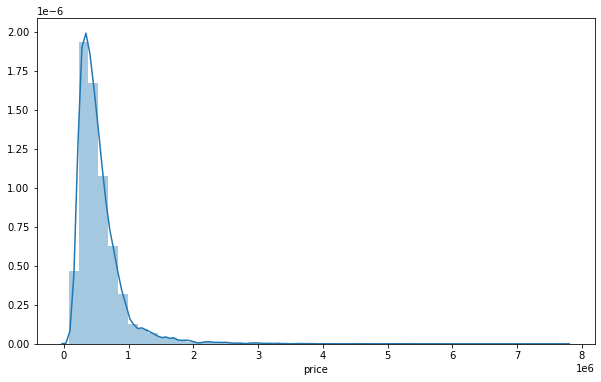

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

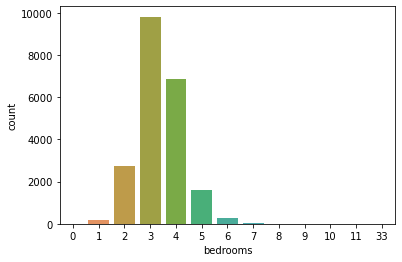

In [19]:
sns.countplot(df['bedrooms'])

In [22]:
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

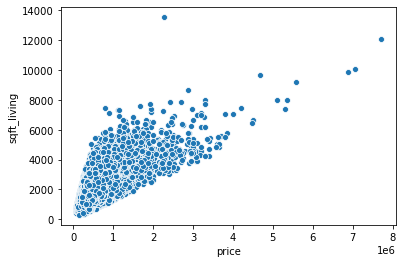

In [26]:
sns.scatterplot(x='price', y='sqft_living', data=df)

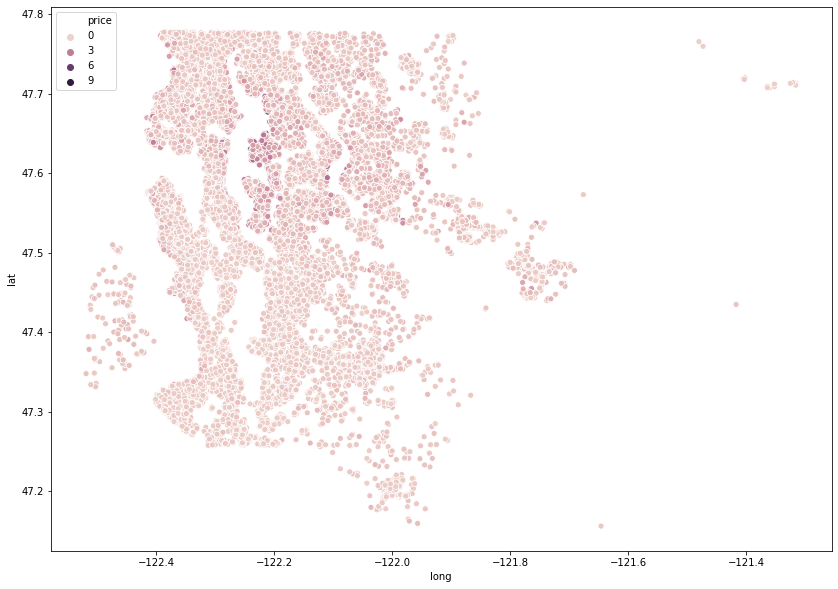

In [31]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='long', y='lat', data=df, hue='price')

In [33]:
# 1 % amount of houses
len(df) *0.01

216.13

In [34]:
# removes the top 1% most expensive houses
bottom_99_perc = df.sort_values('price', ascending=False).iloc[216:]

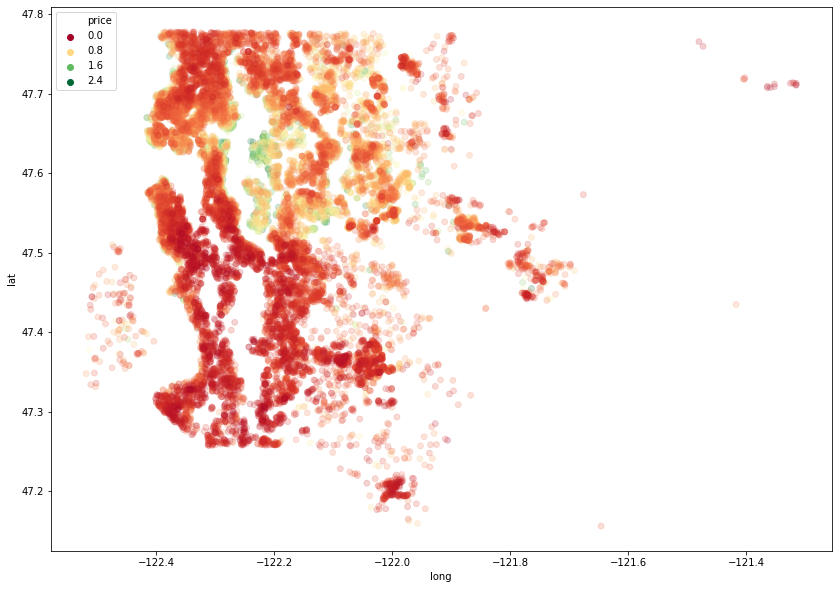

In [40]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='long', y='lat', data=bottom_99_perc, hue='price', edgecolor=None, alpha=0.2, palette='RdYlGn')

##### We can clearly see that houses near water is more expensive

 ## Feature Engeering
Extracting more data from our dataframe...

In [41]:
# Removes the id since it is not usefull at all
df = df.drop('id', axis=1)

In [42]:
# Convert data to datetime64 object
df['date'] = pd.to_datetime(df['date'])

In [44]:
# Extract the year and month to two new columns that we can use
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [45]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


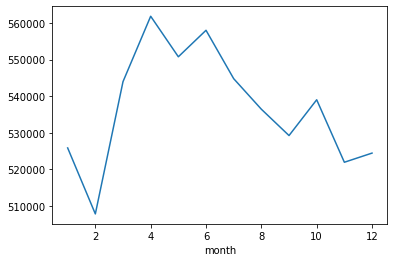

In [47]:
# Group the avarage price by Month and plot in a graph so we can see what month sells best
df.groupby('month').mean()['price'].plot()

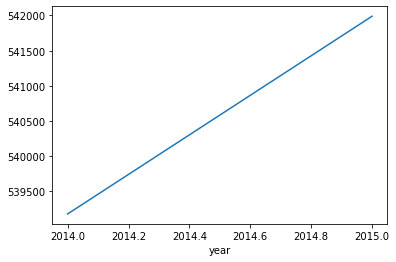

In [49]:
# And by year, which makes sense because as the times go along, houses tend to become more valuable with inflation
df.groupby('year').mean()['price'].plot()

In [50]:
# Cleaning others columns
df = df.drop('date', axis=1)
df = df.drop('zipcode', axis=1)

In [56]:
# Seems useful to us since renovated houses are more popular
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [57]:
# Also important when thinking that 0 basements mean no basement in  the house, so it will have less value in the market
df['sqft_basement'].value_counts()

0       13126
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

### Machine Learn Section